# Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

script_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(script_dir, '..', '..'))
input_filepath = os.path.join(project_root, 'data', 'housing.csv')

housing_data = pd.read_csv(input_filepath)

housing_data.head()
housing_data.dropna(inplace=True)

housing_data = housing_data.drop(housing_data.loc[housing_data["median_house_value"] == 500001].index)

housing_data.describe()

housing_data = pd.get_dummies(housing_data, columns= ["ocean_proximity"], dtype=int)
print(housing_data.shape)
housing_data.head()

(19475, 14)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


# Visualizations

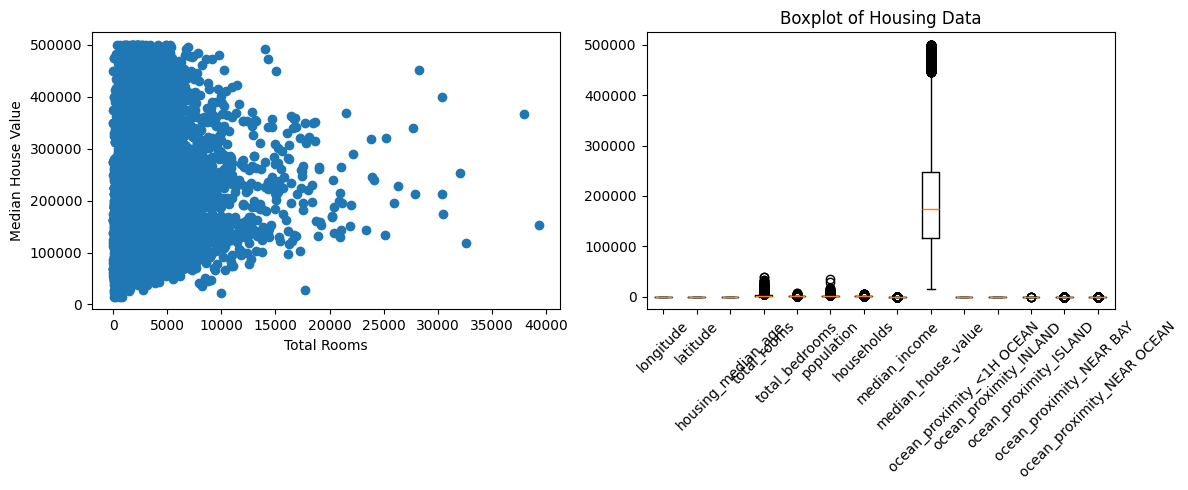

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Use axes[0,0] for plotting, not plt.scatter
axes[0].scatter(x=housing_data["total_rooms"], y=housing_data["median_house_value"])
axes[0].set_xlabel("Total Rooms")
axes[0].set_ylabel("Median House Value")


axes[1].boxplot(housing_data.select_dtypes(include=["number"]).values)
axes[1].set_xticklabels(housing_data.select_dtypes(include=["number"]).columns, rotation=45)
axes[1].set_title("Boxplot of Housing Data")

plt.tight_layout()
plt.show()

# Modeling started

## Splitting

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Prepare features and target
X = housing_data.drop("median_house_value", axis=1)
Y = housing_data["median_house_value"]
print("X Columns:", X.columns.tolist())
print(f"Dataset shape: {housing_data.shape}")

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42  # Added random_state for reproducibility
)
print(f"Training set: {x_train.shape}, Testing set: {x_test.shape}")
print(f"Training target: {y_train.shape}, Testing target: {y_test.shape}")

# Scale the data properly
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"\nScaling applied. Training set stats after scaling:")
print(f"Mean: {x_train_scaled.mean():.2f}, Std: {x_train_scaled.std():.2f}")

# Fit model
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

# Calculate scores
train_score = linear_model.score(x_train_scaled, y_train)
test_score = linear_model.score(x_test_scaled, y_test)

print(f"\nTraining R² score: {train_score:.4f}")
print(f"Testing R² score: {test_score:.4f}")

# Feature importance analysis
coef_df = pd.DataFrame({
    'feature': x_train.columns,
    'coefficient': linear_model.coef_,
    'abs_coefficient': np.abs(linear_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("\nFeature Coefficients (sorted by importance):")
print(coef_df)

# Make predictions
y_pred = linear_model.predict(x_test_scaled)

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"Mean Absolute Error: {mae:,.2f}")

# Create comprehensive prediction dataframe
prediction_df = pd.DataFrame({
    "actual": y_test.values,
    "predicted": y_pred,
    "residual": y_test.values - y_pred,
    "absolute_error": np.abs(y_test.values - y_pred)
})

# Calculate percentage error
prediction_df["percentage_error"] = (prediction_df["residual"] / prediction_df["actual"]) * 100
prediction_df["absolute_percentage_error"] = np.abs(prediction_df["percentage_error"])

print(f"\nPrediction Analysis:")
print(f"Mean Absolute Percentage Error: {prediction_df['absolute_percentage_error'].mean():.2f}%")
print(f"Max Absolute Percentage Error: {prediction_df['absolute_percentage_error'].max():.2f}%")

# Display sample predictions
print("\nSample Predictions (first 10):")
print(prediction_df.head(10).round(2))

# Additional: Model intercept
print(f"\nModel intercept: {linear_model.intercept_:.2f}")

# Optional: Check for potential overfitting
if train_score - test_score > 0.1:
    print("\nWarning: Large gap between training and testing scores suggests potential overfitting")
else:
    print("\nTraining and testing scores are consistent")


X Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
Dataset shape: (19475, 14)
Training set: (15580, 13), Testing set: (3895, 13)
Training target: (15580,), Testing target: (3895,)

Scaling applied. Training set stats after scaling:
Mean: -0.00, Std: 1.00

Training R² score: 0.6118
Testing R² score: 0.6173

Feature Coefficients (sorted by importance):
                       feature   coefficient  abs_coefficient
7                median_income  60378.013857     60378.013857
0                    longitude -49998.858209     49998.858209
1                     latitude -48783.952872     48783.952872
4               total_bedrooms  41526.703709     41526.703709
5                   population -35537.865217     35537.865217
3                  total_rooms -16933.992661     1